## Phase 2

### Header
#### Course Name: Data Intensive Computing
#### phase #: 2
#### term project name: Book Recommendation System

### Q Write down the following information: 
#### 1. Problem Statement: Recommendation systems have been used in various large platforms like e-commerce, entertainment. Online Book recommendations have also been implemented by a few public domains to give customers a more personalized experience. But there are a few setbacks such as recommending genres which are not relevant to user. Our project would be a system that recommends additional books based on previous reads, similar genre, author and publisher. These systems can help companies increase sales and thus improve overall profits. Our main goal is to recommend the best books pertinent to the user.





#### 2. Hypothesis:
   + hypothesis 1:  Top 10 most rated books
   + hypothesis 2: Average rating of most rated books
   + hypothesis 3: Top 25 years of publication
   + hypothesis 4: Grouping of years to generate categorization based on years of publishing
   + hypothesis 5: What ratings users like to give?
   + hypothesis 6: Top rated books
   + hypothesis 7: Number of books by an author
   + hypothesis 8: How many books have been read by different age groups?
   + hypothesis 9: Publishing year of top rated books
   + hypothesis 10: People from which country are reading latest books
   + hypothesis 11: Which age group reads which category?

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 3 Cleaned Datasets
*Display the cleaned dataset after phase 1*


In [81]:
# import your cleaned dataset
cdata = pd.read_csv("/content/drive/MyDrive/Data/Cleaned Data.csv", error_bad_lines= False, encoding = "latin_1")

# display the first five rows data.head(5)
cdata.head()

,User-ID,ISBN,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country
0,276725,034545104X,0,18,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA
1,2313,034545104X,5,23,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA
2,6543,034545104X,0,34,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA
3,8680,034545104X,5,34,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA
4,10314,034545104X,9,13,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA


In [82]:
df = pd.DataFrame(cdata)

# Handled Nan values for country column
df['Country'] = df['Country'].fillna('Unknown')
df.head(10)

,User-ID,ISBN,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country
0,276725,034545104X,0,18,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA
1,2313,034545104X,5,23,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA
2,6543,034545104X,0,34,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA
3,8680,034545104X,5,34,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA
4,10314,034545104X,9,13,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA
5,23768,034545104X,0,45,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA
6,28266,034545104X,0,49,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA
7,28523,034545104X,0,24,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA
8,39002,034545104X,0,33,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,Unknown
9,50403,034545104X,9,25,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA


#### 4 EDA  
Read the piazza post for reference https://piazza.com/class/kk6xmjqekrl1e9?cid=154

**4.1 Method 1**

#### Operation name: ***Top 10 most rated books***
#### Reason for doing this: To check what are the name of books that are highly rated and what is the count of people for the same.
#### Outcome: On observation the top ten books are majorly novels. So the system can recommend Angels and Demons to the person who likes Wild Animus

In [83]:
# Calculating the rating count
rating_count = pd.DataFrame(df.groupby(["Book-Title"])['Book-Rating'].count().sort_values(ascending =False)).head(10)

# display the count
rating_count

,Book-Rating
Book-Title,
Wild Animus,2502
The Lovely Bones A Novel,1295
The Da Vinci Code,883
Divine Secrets of the Ya Ya Sisterhood A Novel,732
The Red Tent Bestselling Backlist,723
A Painted House,647
The Secret Life of Bees,615
Angels amp Demons,586
Where the Heart Is Oprah s Book Club Paperback,585


In [84]:
# Displaying the 10 most rated book with random user details 
isbn = ['0971880107','0316666343', '0385504209', '0060928336', '0312195516','044023722X','0142001740','0671027360','0446672211','059035342X']
highly_rated = pd.DataFrame(isbn, index = np.arange(10), columns = ['ISBN'])
highly_rated_books = pd.merge(highly_rated, df, on='ISBN').drop_duplicates(subset = ['Book-Title']).reset_index()
highly_rated_books

,index,ISBN,User-ID,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country
0,0,0971880107,276925,0,22,Wild Animus,Rich Shapero,2004,Too Far,SPAIN
1,2502,0316666343,276925,0,22,The Lovely Bones A Novel,Alice Sebold,2002,Little Brown,SPAIN
2,3797,0385504209,276925,8,22,The Da Vinci Code,Dan Brown,2003,Doubleday,SPAIN
3,4680,0060928336,277895,0,22,Divine Secrets of the Ya Ya Sisterhood A Novel,Rebecca Wells,1997,Perennial,USA
4,5412,0312195516,277378,7,33,The Red Tent Bestselling Backlist,Anita Diamant,1998,Picador USA,CANADA
5,6135,044023722X,277212,8,48,A Painted House,John Grisham,2001,Dell Publishing Company,USA
6,6782,0142001740,277427,0,48,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,USA
7,7397,0671027360,277439,7,65,Angels amp Demons,Dan Brown,2001,Pocket Star,USA
8,7983,0446672211,277901,7,40,Where the Heart Is Oprah s Book Club Paperba...,Billie Letts,1998,Warner Books,USA
9,8568,059035342X,276939,0,23,Harry Potter and the Sorcerer s Stone Harry P...,J K Rowling,1999,Arthur A Levine Books,FRANCE


**4.2 Method 2**

#### Operation name: ***Average rating of most rated books***
#### Reason for doing this: Finding the average rating of the most rated books, to see if these books can be recommended to the users based on popularity.
#### Outcome: On observation the book 'Wild Animus' is popular, but has an average rating of 1.01. Moreover, the top 10 popular books have an average rating below 5. This implies that the books cannot be recommended solely based on popularity.

In [85]:
# Calculation of average books ratings
avg_rating = pd.DataFrame(df.groupby(['Book-Title'])['Book-Rating'].mean())
avg_rating['count'] = pd.DataFrame(df.groupby(['Book-Title'])['Book-Rating'].count())

In [86]:
#Displaying the Book title and average rating
avg_rating.sort_values('count',ascending = False).head(10)

,Book-Rating,count
Book-Title,,
Wild Animus,1.019584,2502
The Lovely Bones A Novel,4.468726,1295
The Da Vinci Code,4.652322,883
Divine Secrets of the Ya Ya Sisterhood A Novel,3.448087,732
The Red Tent Bestselling Backlist,4.334716,723
A Painted House,3.187017,647
The Secret Life of Bees,4.219512,615
Angels amp Demons,3.718430,586
Where the Heart Is Oprah s Book Club Paperback,4.105983,585


**4.3 Method 3**

#### Operation name: ***Top 25 years of publication.***
#### Reason for doing this: To get an idea of most books read based on year
#### Outcome: Plot showing year wise count.

In [87]:
# Fetching op 25 year of publishing
new_df = df[['Year-Of-Publication']].copy()
new_df['Year-Of-Publication'] = new_df['Year-Of-Publication'].astype(int).astype(str)
new_df = new_df['Year-Of-Publication'].value_counts().head(25).reset_index()
new_df.columns=['year','count']

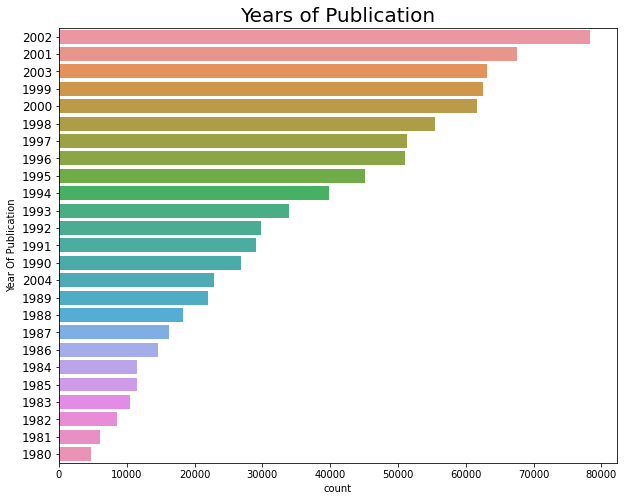

In [88]:
# Display data in barplot
plt.figure(figsize=(10,8))
sns.barplot(x ='count', y ='year', data=new_df)
plt.ylabel('Year Of Publication')
plt.yticks(size=12)
plt.title('Years of Publication',size=20)
plt.show()

**4.4 Method 4**

#### Operation name: ***Grouping of years to generate categorization based on years of publishing.***
#### Reason for doing this: To do detailed analysis on which category of books people enjoy the most.
#### Outcome: The data is very vaguely distributed and hence, proper division was required to display an evenness in the categorization.

In [89]:
# Categorized years by giving intervals and labled them
year_groups = pd.cut(df['Year-Of-Publication'], bins=[1799,1990,1995,2000,2020], labels = ("Ancient", "Recent", "Most Recent", "Latest"))
year_groups

#Display categorywise count
df.groupby(year_groups)['Year-Of-Publication'].count()

Year-Of-Publication
Ancient        190386
Recent         177696
Most Recent    281992
Latest         233005
Name: Year-Of-Publication, dtype: int64

In [90]:
# Stored the above result in original dataframe in 'Category' column
df['Category'] = year_groups
df.tail(10)

,User-ID,ISBN,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country,Category
883069,276681,0140290788,9,43,Time Out Chicago Time Out Chicago,Time Out,2000,Penguin Books,USA,Most Recent
883070,276681,0609806491,7,43,The Zen of Proposal Writing An Expert s Stres...,Kitta Reeds,2002,Three Rivers Press CA,USA,Latest
883071,276681,0764504444,0,43,Access 2000 for Windows for Dummies,John Kaufeld,1999,For Dummies,USA,Most Recent
883072,276681,1931333246,10,43,Chorus,Kurt Messick,2003,Dry Bones Press,USA,Latest
883073,276683,0316185922,5,45,The River Cafe Wine Primer,Joseph Delissio,2000,Little Brown,USA,Most Recent
883074,276688,0425150526,0,66,Death Crosses the Border,Janice Steinberg,1995,Berkley Publishing Group,USA,Recent
883075,276688,0449907422,0,58,Jazz Funeral A Skip Langdon Novel,Julie Smith,1993,Ballantine Books,USA,Recent
883076,276690,0590907301,0,43,Triplet Trouble and the Class Trip Triplet Tr...,Debbie Dadey,1997,Apple,USA,Most Recent
883077,276704,0679752714,0,36,A Desert of Pure Feeling Vintage Contemporaries,Judith Freeman,1997,Vintage Books USA,USA,Most Recent
883078,276704,0806917695,5,63,Perplexing Lateral Thinking Puzzles Scholasti...,Paul Sloane,1997,Sterling Publishing,USA,Most Recent


**4.5 Method 5**

#### Operation name: ***What ratings users like to give?***
#### Reason for doing this: To determine the range of ratings given by the users.
#### Outcome: Plotted graph shows that majority of the users have given the ratings and hence we can take ratings into consideration while recommending books.

In [91]:
# Replaced '0' rating with None to get the correct plot
df['Book-Rating'] = df['Book-Rating'].replace(0, None)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Plot for users ratings')

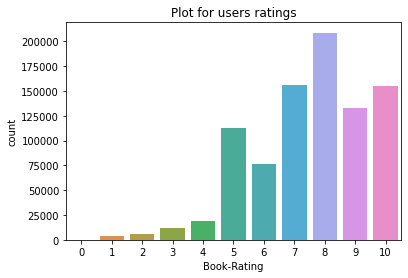

In [92]:
sns.countplot(df['Book-Rating'])
plt.title("Plot for users ratings")

**4.6 Method 6**

#### Operation name: ***Top rated books***
#### Reason for doing this: To identify books which have high ratings
#### Outcome: Shows books with high ratings and how many users rated them and hence can be used for recommending new users.

In [93]:
# column on which group by needs to performed
cols = ['Book-Title']

# Calculated mean by grouping various columns
ratings = pd.DataFrame(df.groupby(cols)['Category','Book-Rating'].mean())

# Stored count of ratings in a column
ratings['Total_Ratings'] = pd.DataFrame(df.groupby('Book-Title')['Book-Rating'].count())

# Fetched those records whose total rating count is >30 and sorted them by book ratings
top_rated = ratings[ratings['Total_Ratings'] > 30].sort_values(by = 'Book-Rating', ascending = False)[:10].reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [94]:
# Top rated books with their total ratings count
top_rated

,Book-Title,Book-Rating,Total_Ratings
0,Harry Potter and the Chamber of Secrets Postca...,9.900000,40
1,Calvin and Hobbes,9.666667,42
2,Mere Christianity A revised and enlarged edit...,9.617647,34
3,My Sister s Keeper A Novel Picoult Jodi,9.581395,43
4,The Cat Who Went to Heaven,9.525000,40
5,Where the Sidewalk Ends Poems and Drawings,9.484848,33
6,52 Deck Series 52 Ways to Celebrate Friendship,9.483871,31
7,Eternity,9.444444,36
8,Attack Of The Deranged Mutant Killer Snow Goons,9.444444,36
9,The Return of the King The Lord of the Rings ...,9.433526,173


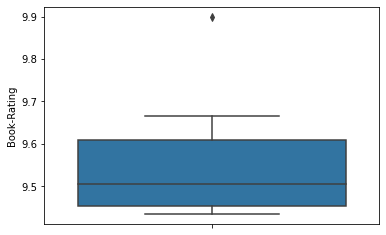

In [95]:
sns.boxplot(y = top_rated['Book-Rating'])

**4.7 Method 7**

#### Operation name: ***Number of books by an author***
#### Reason for doing this: To see how many books are written by each author
#### Outcome: Shows list of authors and their books count. Few books are same but their titles and ISBN are different hence they are counted multiple times. For eg. ' TWELFTH NIGHT ' and ' Twelfth Night  Or  What You Will  With New and Updated Critical Essays and a Revised Bibliography  The Signet Classic Shakespeare ' are same books but since they have different ISBNs in our dataset hence counted as different entities.

In [96]:
# Performed groupby on 'Author' and fetched the count of unique books
author = df.groupby('Book-Author')
author = author.agg({'Book-Title':'nunique'})

In [97]:
# Sorted the book-title count in descending order to display
sorted_author = author.sort_values(by=['Book-Title'], ascending= False).head(5).reset_index()
sorted_author 

,Book-Author,Book-Title
0,William Shakespeare,489
1,Agatha Christie,466
2,Ann M Martin,386
3,Carolyn Keene,370
4,Francine Pascal,339


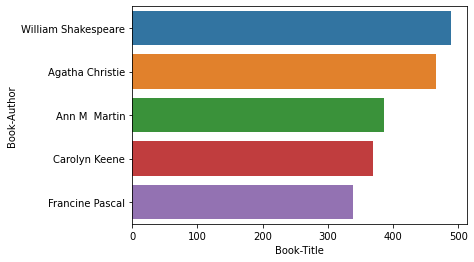

In [98]:
# Barplot showcasing above table data.
sns.barplot(data = sorted_author, x='Book-Title' , y = "Book-Author", orient='h')

**4.8 Method 8**

#### Operation name: ***How many books have been read by different age groups?***
#### Reason for doing this: To get the idea about the audience as per their age groups.
#### Outcome: Users having age between 30-50 have read more books.

In [99]:
# Formed the age groups and grouped them
age_groups = pd.cut(df['Age'], bins=[10, 30, 50, 70, 90])
books_read = df.groupby(age_groups)['Book-Title'].count()
books_read

Age
(10, 30]    294010
(30, 50]    405763
(50, 70]    173590
(70, 90]      2837
Name: Book-Title, dtype: int64

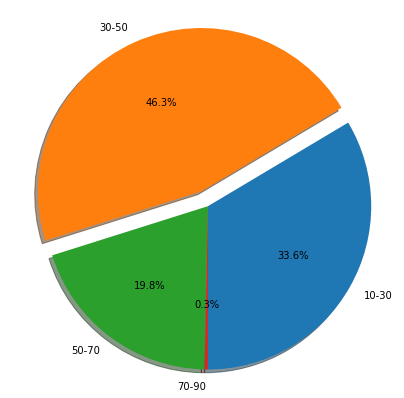

In [100]:
# Labels to show in plot
labels = '10-30', '30-50','50-70', '70-90' 

# Pie chart showing above table to understand it better
fig1, ax1 = plt.subplots(figsize=(7,7))
explode = (0, 0.1, 0, 0)
ax1.pie(books_read, explode, labels ,shadow=True,autopct='%1.1f%%', startangle=270)
ax1.axis('equal')
plt.show()

**4.9 Method 9**

#### Operation name: ***Publishing year of top rated books***
#### Reason for doing this: To check if there is any year in which most top rated books were published.
#### Outcome: No such year was found hence cannot use this analysis for recommendation.

In [101]:
# Created a list of top rated book-titles
title_list = top_rated['Book-Title'].to_list()

# Fetched records from original dataframe for the above list of titles
tb = pd.DataFrame(df.loc[df['Book-Title'].isin(title_list)])

# Retained only unique titles based on their ISBN
pyear = tb.drop_duplicates(subset=['ISBN']).reset_index()

In [102]:
# Top rated books with their publishing year
pyear[['Book-Title','Year-Of-Publication']]

,Book-Title,Year-Of-Publication
0,Attack Of The Deranged Mutant Killer Snow Goons,1992
1,Calvin and Hobbes,1987
2,Where the Sidewalk Ends Poems and Drawings,1974
3,The Return of the King The Lord of the Rings ...,1986
4,Eternity,1992
5,Mere Christianity A revised and enlarged edit...,1984
6,My Sister s Keeper A Novel Picoult Jodi,2004
7,The Cat Who Went to Heaven,1990
8,Harry Potter and the Chamber of Secrets Postca...,2002
9,52 Deck Series 52 Ways to Celebrate Friendship,2000


**4.10 Method 10**

#### Operation name: ***People from which country are reading latest books***
#### Reason for doing this: To see in which countries latest books are most read
#### Outcome: Countrywise count of latest books

In [103]:
# Fetched latest books
rslt_df = df[df['Category'] == 'Latest']

# Dropped duplicate records
rslt_df = rslt_df.drop_duplicates(subset=['ISBN'])

# Grouped them based on country
rslt = rslt_df.groupby(['Country']).count()[['Category']]

In [104]:
rslt.sort_values(by='Category', ascending= False)

,Category
Country,
USA,31725
CANADA,3112
GERMANY,2976
Unknown,2633
UNITED KINGDOM,2394
...,...
NIGERIA,1
RWANDA,1
UZBEKISTAN,1


**4.11 Method 11**

#### Operation name: ***Which age group reads which category?***
#### Reason for doing this: To check the count as per category in each age group.
#### Outcome: Got the counts for each category of books as per age groups.

In [105]:
# Created a new dataframe to perform grouping
ndata = pd.DataFrame(cdata)
ndata['Age_groups'] = age_groups
ndata['Age_groups'] = (ndata['Age_groups'].astype('str'))
ndata.head()

,User-ID,ISBN,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country,Category,Age_groups
0,276725,034545104X,0,18,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA,Latest,"(10.0, 30.0]"
1,2313,034545104X,5,23,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA,Latest,"(10.0, 30.0]"
2,6543,034545104X,5,34,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA,Latest,"(30.0, 50.0]"
3,8680,034545104X,5,34,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA,Latest,"(30.0, 50.0]"
4,10314,034545104X,9,13,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,USA,Latest,"(10.0, 30.0]"


In [106]:
# Calculated gr0up wise count for different age groups
filter_data = ndata[ndata.Category == 'Ancient'].groupby(['Age_groups']).count()[['Category']].head(4)
filter_data['Ancient'] = ndata[ndata.Category == 'Ancient'].groupby(['Age_groups']).count().head(4)[['Category']]
filter_data['Recent'] = ndata[ndata.Category == 'Recent'].groupby(['Age_groups']).count().head(4)[['Category']]
filter_data['Most Recent'] = ndata[ndata.Category == 'Most Recent'].groupby(['Age_groups']).count().head(4)[['Category']]
filter_data['Latest'] = ndata[ndata.Category == 'Latest'].groupby(['Age_groups']).count().head(4)[['Category']]
filter_data = filter_data.drop(['Category'],axis=1)

In [107]:
# Final groupwise counts
filter_data

,Ancient,Recent,Most Recent,Latest
Age_groups,,,,
"(10.0, 30.0]",61256,58941,97339,76474
"(30.0, 50.0]",87383,81362,129258,107760
"(50.0, 70.0]",39299,35351,52369,46571
"(70.0, 90.0]",694,517,845,781


### Submission guideline:
1. write your code and report in this notebook. 
2. save this notebook as <person1ubname_person2ubname.ipynb>.
3. save your raw data in data folder.
4. save the notebook file with data folder in a folder named <person1ubname_person2ubname.zip>. 
5. upload your zip file to the ub learns.

**Each person from a team needs to make submissions.**

### Grading:
    0 – no submission by deadline
    5 – with 0-3 valid and non-repeating EDA operations;
    10 – with 4-8 valid and non-repeating EDA operations;
    15 – with 9 valid and non-repeating EDA operations;
    20 - with 10 valid and non-repeating EDA operations;
    25 - Completely master EDA and every step is perfect;
    
Once the deadline is past, you get a zero for the phase if you did not submit anything, even though you need to complete the phase to work on the next phase.
